# Unsupervised Learning

In [161]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('C:/Users/Drago/iCloudDrive/Documents/Documents - Mike’s MacBook Pro/Python/Portfolio/beginner_datasets\iris.csv')

In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
# Change categorical data to 0-2
df['species'] = pd.Categorical(df['species'])
df['species'] = df['species'].cat.codes

## Normalization

In [76]:
numeric_col = df.select_dtypes(include='float64')

In [7]:
normalizer = MinMaxScaler()

In [78]:
df_normalized = pd.DataFrame(normalizer.fit_transform(numeric_col), columns=numeric_col.columns)

In [84]:
df_con = pd.concat([df['species'],df_normalized],axis=1)

In [147]:
df_con.describe()

,species,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.000000,0.428704,0.439167,0.467571,0.457778
std,0.819232,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.222222,0.333333,0.101695,0.083333
50%,1.000000,0.416667,0.416667,0.567797,0.500000
75%,2.000000,0.583333,0.541667,0.694915,0.708333
max,2.000000,1.000000,1.000000,1.000000,1.000000


## EDA

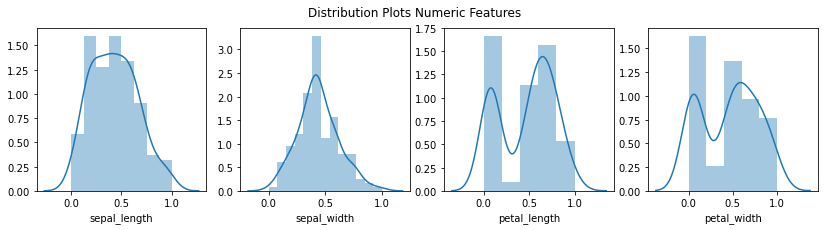

In [69]:
fig, ax = plt.subplots(1,4, figsize=(14,3))
fig.suptitle('Distribution Plots Numeric Features')
sns.distplot(df_normalized['sepal_length'], ax=ax[0])
sns.distplot(df_normalized['sepal_width'], ax=ax[1])
sns.distplot(df_normalized['petal_length'], ax=ax[2])
sns.distplot(df_normalized['petal_width'], ax=ax[3])

### Distplot with for loop

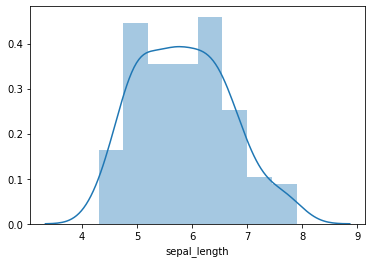

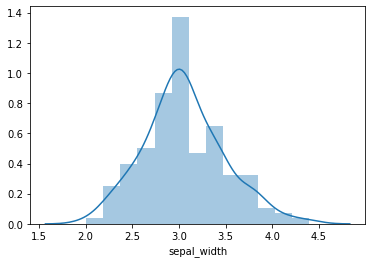

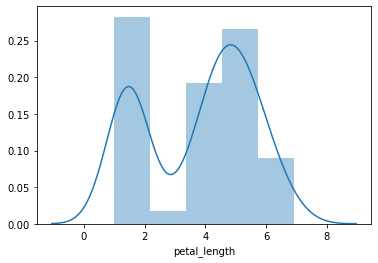

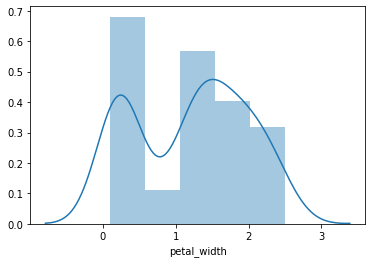

In [229]:
for i, col in enumerate(numeric_col.columns):    
    plt.figure(i)
    sns.distplot(numeric_col[col])

## Dendrogram

### Ward linkage
- it minimizes the sum of the squared distances within all clusters, is like using euclidian distance

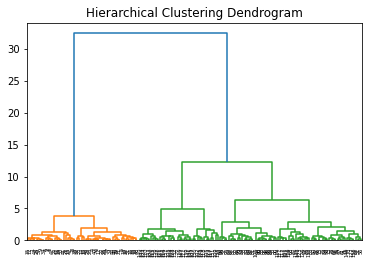

In [121]:
plt.title('Hierarchical Clustering Dendrogram')
dendrogram = hierarchy.dendrogram(linkage(numeric_col, method='ward'))
plt.show()

## Agglomerative Clustering

In [126]:
hc = AgglomerativeClustering(affinity = 'euclidean', linkage='ward')
hc.fit(numeric_col)
print(hc.n_clusters_)

2


## Choosing the optimal number of clusters

### Silhouette Method

In [140]:
silhouette_scores = []
for n_clusters in range (2,9):
    kmeans = KMeans(n_clusters = n_clusters)
    preds = kmeans.fit_predict(numeric_col)
    score = silhouette_score(numeric_col, preds, metric='euclidean')
    silhouette_scores.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6808136202936816
For n_clusters = 3, silhouette score is 0.5525919445499757
For n_clusters = 4, silhouette score is 0.4978256901095472
For n_clusters = 5, silhouette score is 0.4885175508886279
For n_clusters = 6, silhouette score is 0.36820569682713084
For n_clusters = 7, silhouette score is 0.346887933976151
For n_clusters = 8, silhouette score is 0.33842731371406654
For n_clusters = 9, silhouette score is 0.3282647290959334


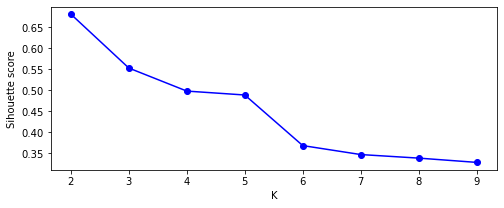

In [144]:
plt.figure(figsize=(8,3))
plt.plot(range(2,10), silhouette_scores, "bo-")
plt.xlabel('K')
plt.ylabel('Sihouette score')
plt.show()

- When n_clusters is 2, it gives the highest silhouette score. Thefore the data values are near others in sasme cluster and very far from others in other clusters

### Check the quality of clusters

In [172]:
model = KMeans(n_clusters=2)
model.fit(numeric_col)

labels = model.predict(numeric_col)

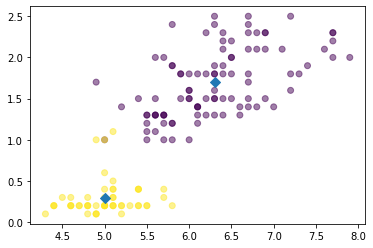

In [174]:
xs = numeric_col.iloc[:, 0]
ys = numeric_col.iloc[:,3]

plt.scatter(xs, ys, c = labels, alpha=0.5)
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,3]
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.tile('n_clusters')
plt.show()

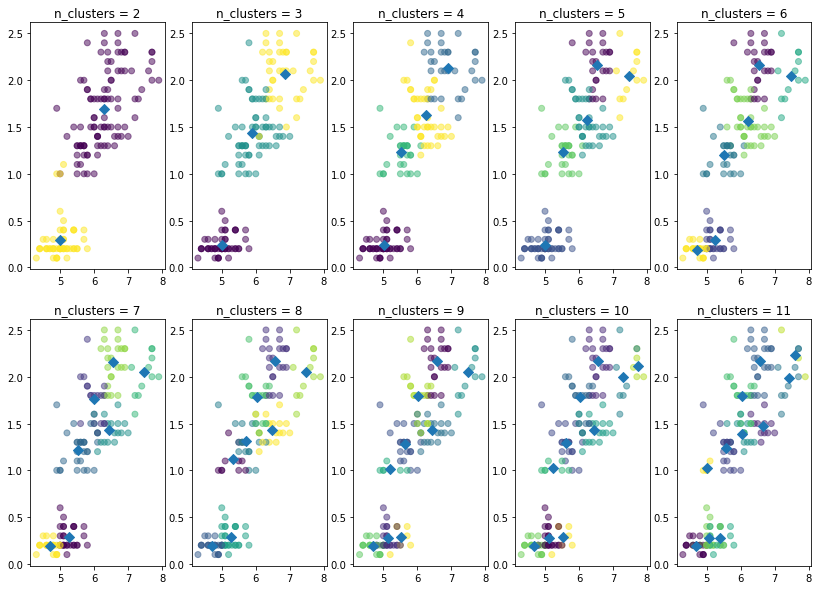

In [227]:
a = 2 #rows
b = 5 #columns
c = 1 #initialize plot counter
fig = plt.figure(figsize=(14,10))
for n_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=n_clusters)
    preds = kmeans.fit_predict(numeric_col)
    plt.subplot(a,b,c)
    plt.scatter(xs, ys, c = preds, alpha=0.5)
    plt.title("n_clusters = " + str(n_clusters))
    centroids = kmeans.cluster_centers_
    centroids_x = centroids[:,0]
    centroids_y = centroids[:,3]
    plt.scatter(centroids_x, centroids_y, marker='D', s=50)
    c = c + 1
plt.show()

## Elbow Method

In [131]:
sum_of_squared_distances = []

In [132]:
for k in range (1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(numeric_col)
    sum_of_squared_distances.append(kmeans.inertia_)

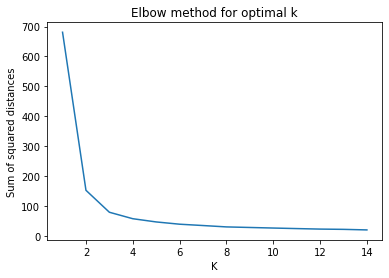

In [133]:
plt.plot(range(1, 15), sum_of_squared_distances)
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k')
plt.show()

## Compare baseline VS using K-Means as a preprocessing step

In [149]:
X = df_con.drop(['species'], axis=1)
y = df_con['species']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [154]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9555555555555556

In [159]:
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=1)),
    ('lr', LogisticRegression())
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=1)), ('lr', LogisticRegression())])

In [160]:
pipeline.score(X_test, y_test)

0.7111111111111111

### Finding the optimal K with GridSearch

In [165]:
param_grid = dict(kmeans__n_clusters=range(2,10))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ................ kmeans__n_clusters=2, score=0.914, total=   0.0s
[CV] kmeans__n_clusters=2 ............................................
[CV] ................ kmeans__n_clusters=2, score=0.943, total=   0.0s
[CV] kmeans__n_clusters=2 ............................................
[CV] ................ kmeans__n_clusters=2, score=0.943, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ................ kmeans__n_clusters=3, score=0.886, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ................ kmeans__n_clusters=3, score=0.829, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ................ kmeans__n_clusters=3, score=0.943, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................ kmeans__n_clusters=4, score=0.914, total=   0.0s
[CV] kmeans__n_clusters=5 ............................................
[CV] ................ kmeans__n_clusters=5, score=0.886, total=   0.0s
[CV] kmeans__n_clusters=5 ............................................
[CV] ................ kmeans__n_clusters=5, score=0.829, total=   0.0s
[CV] kmeans__n_clusters=5 ............................................
[CV] ................ kmeans__n_clusters=5, score=0.943, total=   0.0s
[CV] kmeans__n_clusters=6 ............................................
[CV] ................ kmeans__n_clusters=6, score=0.886, total=   0.0s
[CV] kmeans__n_clusters=6 ............................................
[CV] ................ kmeans__n_clusters=6, score=0.829, total=   0.0s
[CV] kmeans__n_clusters=6 ............................................
[CV] ................ kmeans__n_clusters=6, score=0.943, total=   0.0s
[CV] kmeans__n_clusters=7 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=1)),
                                       ('lr', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 10)}, verbose=3)

In [166]:
grid_clf.best_params_

{'kmeans__n_clusters': 2}

In [167]:
grid_clf.score(X_test, y_test)

0.9555555555555556